In [5]:
import matplotlib.pyplot as plt
import numpy as np 


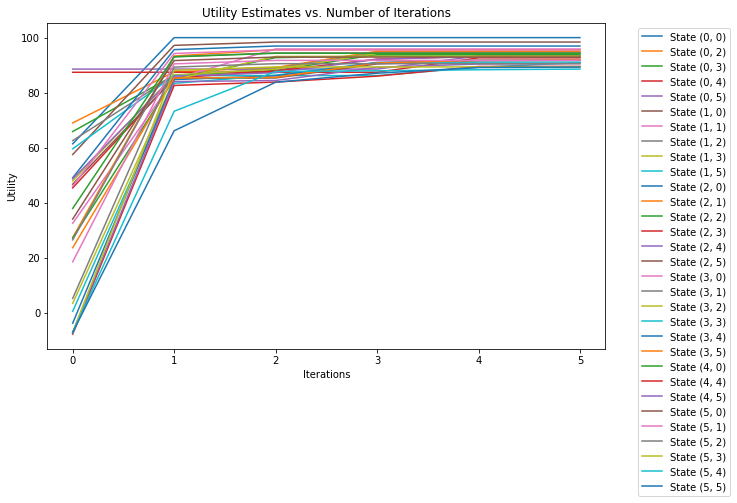

Number of iterations before convergence: 6

Optimal Policy:
[['up' 'Wall' 'left' 'left' 'left' 'up']
 ['up' 'left' 'left' 'left' 'Wall' 'up']
 ['up' 'left' 'left' 'up' 'left' 'left']
 ['up' 'left' 'left' 'up' 'up' 'up']
 ['up' 'Wall' 'Wall' 'Wall' 'up' 'up']
 ['up' 'left' 'left' 'left' 'up' 'up']]

Utilities of states:
[['100.00' 'Wall' '95.05' '93.87' '92.65' '93.33']
 ['98.39' '95.88' '94.54' '94.40' 'Wall' '90.92']
 ['96.95' '95.59' '93.29' '93.18' '93.10' '91.79']
 ['95.55' '94.45' '93.23' '91.12' '91.81' '91.89']
 ['94.31' 'Wall' 'Wall' 'Wall' '89.55' '90.57']
 ['92.94' '91.73' '90.54' '89.36' '88.57' '89.30']]


In [6]:
grid_size =(6,6)
walls = [(0, 1), ( 1, 4), ( 4, 1), ( 4, 3), (4, 2)]
green_squares = [(0, 0), (0, 2), ( 0, 5), (1, 3), ( 2, 4), (3, 5)]
brown_squares = [(1, 1), (2, 2), (1, 5), (3, 3), (4, 4)]
actions = ['up', 'down', 'left', 'right']
# Rewards setup
reward_green = 1
reward_white = -0.04
reward_brown = -1
rewards = np.full(grid_size, reward_white)
for x, y in green_squares:
    rewards[x, y] = reward_green
for x, y in brown_squares:
    rewards[x, y] = reward_brown

# Probability setup
prob_forward = 0.8
prob_side = 0.1

# Discount factor
gamma = 0.99

# Initialize utilities and policy
utilities = np.zeros(grid_size)
policy = np.full(grid_size, ' ', dtype='<U5')  # Placeholder for non-wall cells

# Function to check if a state is valid (not a wall and within grid)
def is_valid_state(x, y):
    return (0 <= x < grid_size[0]) and (0 <= y < grid_size[1]) and (x, y) not in walls

# Calculate expected utility of performing an action from a state
def expected_utility(action, x, y, utilities):
    if action == 'up':
        forward = (x - 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'down':
        forward = (x + 1, y)
        side1 = (x, y - 1)
        side2 = (x, y + 1)
    elif action == 'left':
        forward = (x, y - 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)
    elif action == 'right':
        forward = (x, y + 1)
        side1 = (x - 1, y)
        side2 = (x + 1, y)

    
    utility_sum = 0
    for nx, ny in [forward, side1, side2]:
        if is_valid_state(nx, ny):
            p = prob_forward if (nx, ny) == forward else prob_side
            utility_sum += p * utilities[nx, ny]
        else:
            utility_sum += (prob_forward if (nx, ny) == forward else prob_side) * utilities[x, y]
    return utility_sum

initial_policy = np.random.choice(actions, size=grid_size)
for wall in walls:
    initial_policy[wall] = None  # No policy for wall states


# Correct the policy_evaluation function to pass the utilities array
def policy_evaluation(policy, utilities):
    while True:
        delta = 0
        new_utilities = utilities.copy()
        for x in range(grid_size[0]):
            for y in range(grid_size[1]):
                if not is_valid_state(x, y):
                    continue
                utility = rewards[x, y] + gamma * expected_utility(policy[x, y], x, y, utilities)
                delta = max(delta, abs(utility - utilities[x, y]))
                new_utilities[x, y] = utility
        if delta < 0.01*(1-gamma)/gamma:
            break
        utilities = new_utilities
    return utilities

# Correct the policy_improvement function to pass the utilities array
def policy_improvement(utilities, policy):
    policy_stable = True
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            if not is_valid_state(x, y):
                continue
            old_action = policy[x, y]
            max_utility = -np.inf
            for action in actions:
                utility = rewards[x, y] + gamma * expected_utility(action, x, y, utilities)
                if utility > max_utility:
                    max_utility = utility
                    policy[x, y] = action
            if old_action != policy[x, y]:
                policy_stable = False
    return policy, policy_stable

# Run the policy iteration code with the corrected functions
utilities = np.zeros(grid_size)
policy = initial_policy.copy()
utilities_history = []  # Track utilities for plotting
iteration = 0

while True:
    utilities = policy_evaluation(policy, utilities)
    utilities_history.append(utilities.copy())
    policy, policy_stable = policy_improvement(utilities, policy)
    iteration += 1
    if policy_stable:
        break

# Create readable policy and utilities output
policy_readable = np.full(grid_size, 'Wall')
utilities_readable = np.full(grid_size, 'Wall', dtype='<U10')
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            policy_readable[x, y] = policy[x, y]
            utilities_readable[x, y] = f"{utilities[x, y]:.2f}"

# Plotting utilities as a function of iterations
plt.figure(figsize=(10, 6))
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if is_valid_state(x, y):
            utilities_xy = [utilities_history[i][x, y] for i in range(len(utilities_history))]
            plt.plot(utilities_xy, label=f'State ({x}, {y})')

plt.xlabel('Iterations')
plt.ylabel('Utility')
plt.title('Utility Estimates vs. Number of Iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display results
print("Number of iterations before convergence:", iteration)
print()
print("Optimal Policy:")
print(policy_readable)
print()
print("Utilities of states:")
print(utilities_readable)